## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

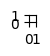

In [2]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})

In [3]:
# Variables for the per capita growth rate
ymax = 20
parts = 2000
y_increasing1 = np.linspace(0,ymax,parts)
y_increasing2 = np.linspace(0,ymax,parts)
per_capita1 = np.zeros(parts)
per_capita2 = np.zeros(parts)
y1_posterior = np.zeros(parts)
y2_posterior = np.zeros(parts)

In [4]:
r1=20
r2=16
a11=2.7
a12=0.6
a21=0.6
a22=0.6

## cov > 0

r1=20
r2=12
a11=1
a12=1
a21=0.1
a22=1

## cov < 0

r1=20
r2=11
a11=1
a12=1
a21=0.1
a22=1

## cov = zero

r1=20
r2=11
a11=1
a12=1
a21=1
a22=1

## Increasing N1 and N2

In [5]:
## Discrete-time competitive Beverton-Holt model
for i in range(parts):
    for j in range(parts):
        per_capita1[i] = r1 / ( 1 + a11 * y_increasing1[i] + a12 * y_increasing2[j] )
        per_capita2[j] = r2 / ( 1 + a22 * y_increasing2[j] + a21 * y_increasing1[i] )
        y1_posterior[i] = y_increasing1[i] * per_capita1[i]
        y2_posterior[j] = y_increasing2[j] * per_capita2[j]
y_rel1 = y1_posterior/(y1_posterior+y2_posterior)
y_rel2 = y2_posterior/(y1_posterior+y2_posterior)

/tmp/ipykernel_31806/3600443262.py:8: RuntimeWarning: invalid value encountered in true_divide
  y_rel1 = y1_posterior/(y1_posterior+y2_posterior)
/tmp/ipykernel_31806/3600443262.py:9: RuntimeWarning: invalid value encountered in true_divide
  y_rel2 = y2_posterior/(y1_posterior+y2_posterior)


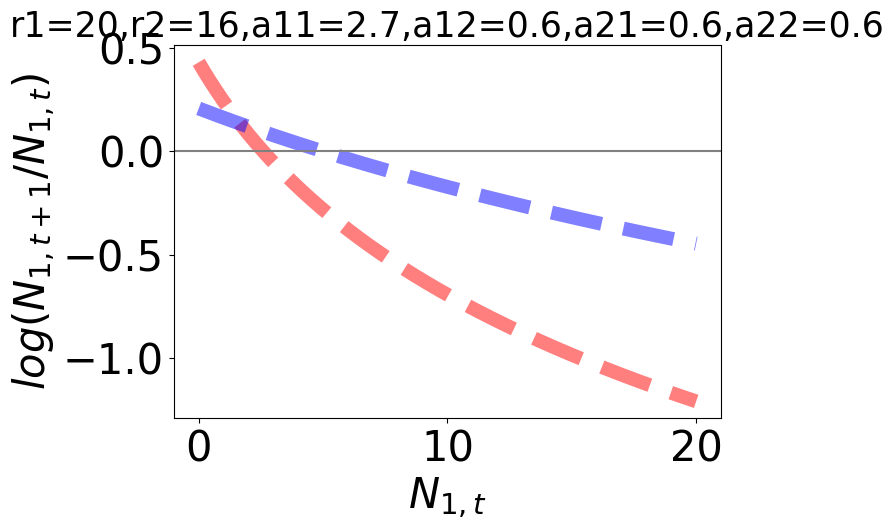

In [6]:
fig, ax = plt.subplots(1,figsize=(8, 6))
ax.plot(y_increasing1, np.log(per_capita1), alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r")
ax.plot(y_increasing2, np.log(per_capita2), alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b")
ax.axhline(y=0, color='grey', linestyle='-')
ax.set(xlabel='$N_{1,t}$',ylabel='$log(N_{1,t+1}/N_{1,t})$')
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/increasing_PGR_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

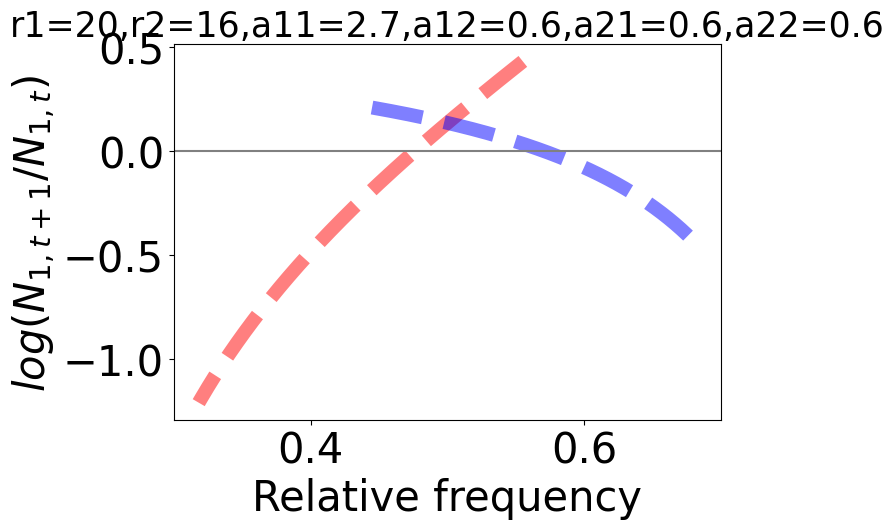

In [9]:
fig, ax = plt.subplots(1,figsize=(8, 6))
ax.plot(y_rel1, np.log(per_capita1), alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r")
ax.plot(y_rel2, np.log(per_capita2), alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b")
ax.axhline(y=0, color='grey', linestyle='-')
ax.set(xlabel='Relative frequency',ylabel='$log(N_{1,t+1}/N_{1,t})$')
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/increasing_yenni_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

## Finite Growth Rate and Stock Recruitment Curve

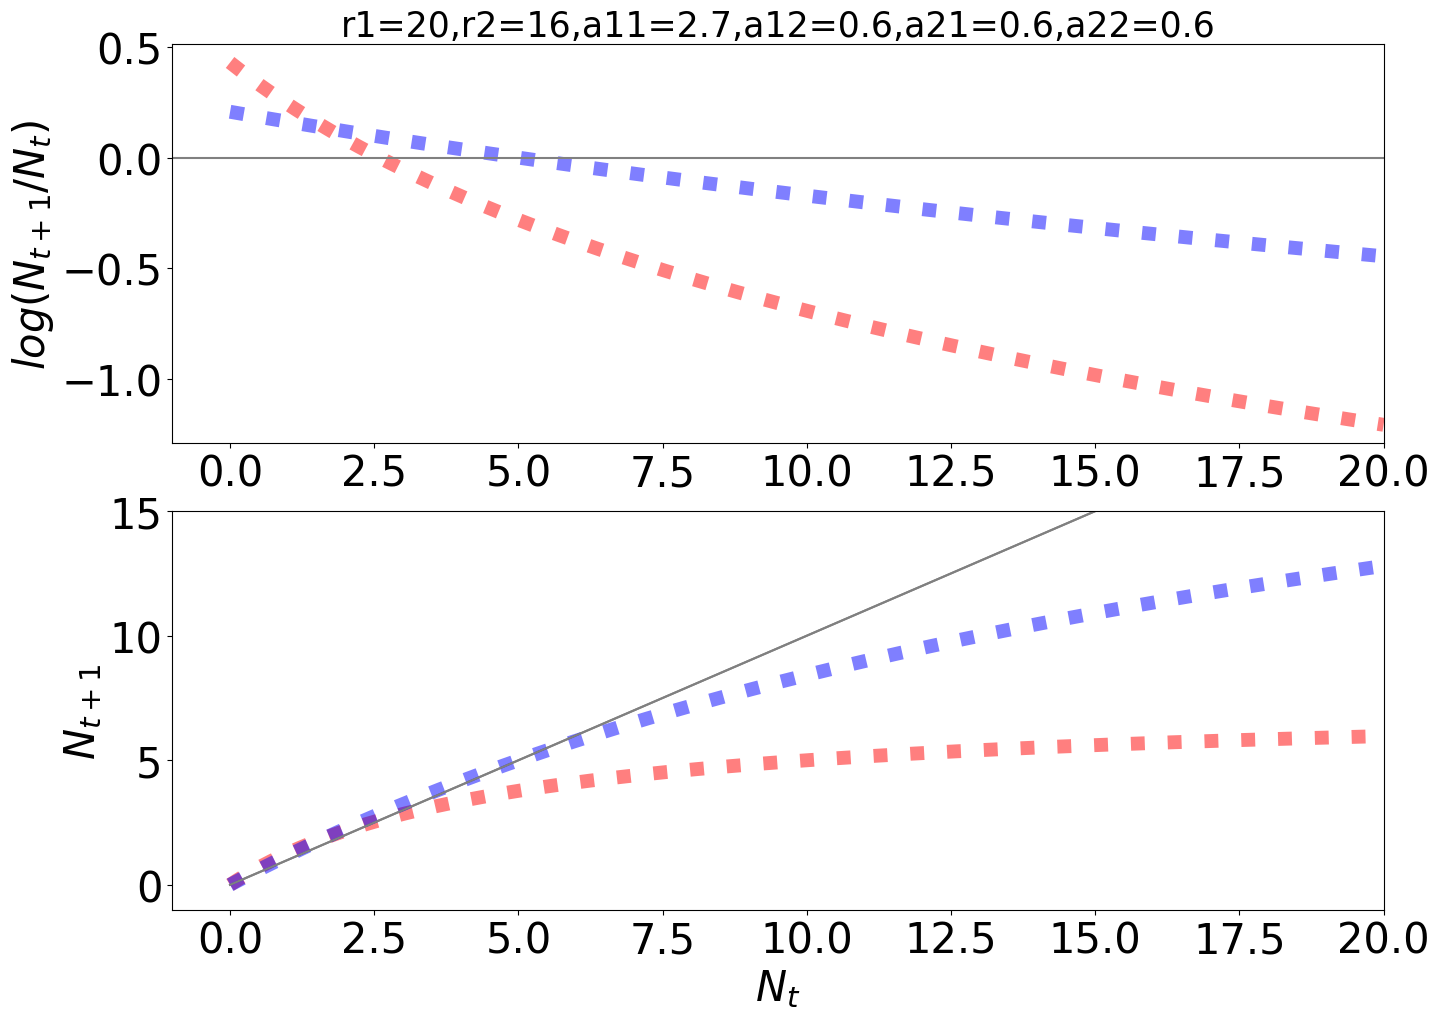

In [8]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
# Finite Growth Rate
ax1.plot(y_increasing1, np.log(per_capita1), alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="r")
ax1.set(ylabel='$log(N_{t+1}/N_{t})$')
ax1.set_xlim([-1, 20])
ax1.plot(y_increasing2, np.log(per_capita2), alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="b")
ax1.axhline(y=0, color='grey', linestyle='-')
# Stock-Recruitment
ax2.plot(y_increasing1, y1_posterior, alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="r")
ax2.plot(y_increasing1,y_increasing1, color="grey") # add a straight line
ax2.set_xlim([-1, 20])
ax2.set_ylim([-1, 15])
ax2.set(xlabel='$N_{t}$', ylabel='$N_{t+1}$')
ax2.plot(y_increasing2, y2_posterior, alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="b")
ax2.plot(y_increasing2,y_increasing2, color="grey") # add a straight line
plt.rcParams.update({'font.size': 30})
ax1.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout(pad=0)
plt.savefig('img/increasing_finite_growth_rate_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50, bbox_inches='tight')
plt.show()